### Notebook to investigate parenteral opioid dispensing trends
A notebook using [English Prescribing Data](https://www.nhsbsa.nhs.uk/prescription-data/prescribing-data/english-prescribing-data-epd) to investigate trends in parenteral opioid dispensing data.
- [Imports](#IMPORTS)
- [Standard functions](#FUNCTIONS)
- [OpenPrescribing data extract](#OPBNF)
- [Item plots](#CHARTS)

<a id='IMPORTS'></a>
### Imports
Import libraries required for analysis

In [1]:
#import libraries required for analysis
from ebmdatalab import bq
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#set to display all rows in data
#pd.set_option('display.max_rows', None)

<a id='FUNCTIONS'></a>
### Standard functions
Setup standard functions

In [2]:
def plot(df, column_to_plot, chart_title, y_label, y_min='default', y_max='default', lockdownline=False):
    ax = df.groupby(["month"])[column_to_plot].sum().plot(kind='line', title=chart_title)
    plt.xticks(rotation=90);
    plt.ylabel(y_label);
    if (y_min!='default'):
        plt.ylim((y_min, y_max));
    else:
        y_max=df[column_to_plot].max() * 1.05
    if (lockdownline):
        plt.vlines(x=[pd.to_datetime("2020-03-23")], ymin=0, ymax=int(y_max), colors="red", ls="--", label="Start of restrictions");
    plt.grid();

<a id='OPBNF'></a>
### OpenPrescribing data extract
Get [English Prescribing Data](https://www.nhsbsa.nhs.uk/prescription-data/prescribing-data/english-prescribing-data-epd) from BigQuery for monthly items based on BNF codes in this [morphine codelist](https://www.opencodelists.org/codelist/opensafely/morphine-subcutaneous-dmd/1185fc5b/) and this [oxycodone codelist](https://www.opencodelists.org/codelist/opensafely/oxycodone-subcutaneous-dmd/2a956f90/).

In [8]:
#OpenPrescribing BNF codes
sql = '''
SELECT
     CAST(month AS DATE) AS month,
     SUM (CASE WHEN bnf_code IN ("0407020Q0AAA2A2", "0407020Q0AAA3A3", "0407020Q0AAA4A4", "0407020Q0AAA5A5", "0407020Q0AAA8A8",
                                 "0407020Q0AAAAAA", "0407020Q0AAABAB", "0407020Q0AAACAC", "0407020Q0AAADAD", "0407020Q0AAAEAE", 
                                 "0407020Q0AAAFAF", "0407020Q0AAAMAM", "0407020Q0AABCBC", "0407020Q0AADIDI", "0407020Q0AAFCFC", 
                                 "0407020Q0AAFJFJ", "0407020Q0AAFKFK", "0407020Q0AAFTFT", "0407020Q0AAFVFV", "0407020Q0AAFWFW", 
                                 "0407020Q0AAFZFZ", "0407020Q0AAGAGA", "0407020Q0BEABFJ"
                                 )  THEN items ELSE 0 END) as SCMorphine,
     SUM (CASE WHEN bnf_code IN ("0407020ADAAALAL", "0407020ADAAAMAM", "0407020ADAAANAN", "0407020ADBBAFAL", "0407020ADBBAGAM", 
                                 "0407020ADBBAHAN", "0407020ADBJADAL", "0407020ADBJAEAM", "0407020ADBJAFAN"
                                 )  THEN items ELSE 0 END) as SCOxycodone,
 FROM hscic.normalised_prescribing
 WHERE month >= '2018-01-01'
 GROUP BY month
 ORDER BY month'''

OP_DF = bq.cached_read(sql, csv_path=os.path.join('../..','data','scmorphineoxycodone.csv'))

In [9]:
OP_DF

,month,ParenteralMorphine,ParenteralOxycodone
0,2018-01-01,12061,3592
1,2018-02-01,10393,3253
2,2018-03-01,10777,3620
3,2018-04-01,9743,3167
4,2018-05-01,10084,3542
5,2018-06-01,10426,3461
6,2018-07-01,10774,3568
7,2018-08-01,11247,3804
8,2018-09-01,10524,3465
9,2018-10-01,11793,3684


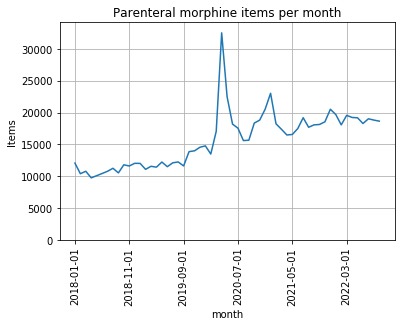

In [11]:
plot(
    df=OP_DF, 
    column_to_plot='SCMorphine', 
    chart_title="SC morphine items per month", 
    y_label='Items', 
    y_min=0, 
    y_max=OP_DF['SCMorphine'].max() * 1.05, 
)

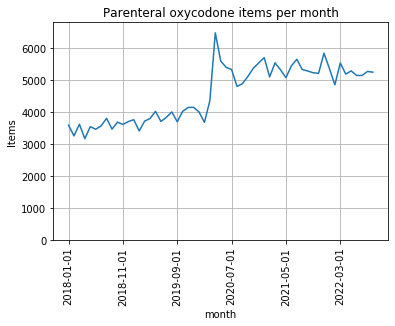

In [12]:
plot(
    df=OP_DF, 
    column_to_plot='SCOxycodone', 
    chart_title="SC oxycodone items per month", 
    y_label='Items', 
    y_min=0, 
    y_max=OP_DF['ParenteralOxycodone'].max() * 1.05, 
)